In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [286]:
df=pd.read_csv(r'C:\Users\pnaik27\Anaconda\Algorithm\Linear Regression\Boston House Price\Bengaluru_House_Data.csv')
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [287]:
df.shape

(13320, 9)

In [288]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [289]:
df['availability'].uniqueque()

AttributeError: 'Series' object has no attribute 'uniqueque'

In [ ]:
df['area_type'].value_counts()

In [329]:
final_dataset=df[['location', 'size','total_sqft', 'bath', 'price']]

In [330]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [331]:
final_dataset

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [332]:
final_dataset.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [333]:
final_dataset.dropna(subset=['size','bath','location'],inplace=True)

C:\Users\pnaik27\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [334]:
final_dataset.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [335]:
final_dataset['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
19 BHK           1
16 BHK           1
12 Bedroom       1
27 BHK           1
14 BHK           1
43 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [336]:
final_dataset['BHK']=final_dataset['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\pnaik27\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [337]:
final_dataset.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [338]:
final_dataset[final_dataset.BHK>15]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [339]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [340]:
final_dataset[~final_dataset['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [341]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [342]:
def avgs(x):
    token=x.split('-')
    if len(token)==2:
        return ((float(token[0]))+(float(token[1])))/2
    try:
        return float(x)
    except:
        return None

In [343]:
avgs('124dsds')

In [344]:
final_dataset['total_sqft']=final_dataset['total_sqft'].apply(avgs)

C:\Users\pnaik27\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [345]:
final_dataset.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

In [346]:
final_dataset.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [347]:
final_dataset.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [348]:
final_dataset[final_dataset['total_sqft'].isnull()]

,location,size,total_sqft,bath,price,BHK
410,Kengeri,1 BHK,NaN,1.0,18.50,1
648,Arekere,9 Bedroom,NaN,9.0,265.00,9
775,Basavanagara,1 BHK,NaN,2.0,93.00,1
872,Singapura Village,2 BHK,NaN,2.0,45.00,2
1019,Marathi Layout,1 Bedroom,NaN,1.0,110.00,1
1086,Narasapura,2 Bedroom,NaN,2.0,29.50,2
1400,Chamrajpet,9 BHK,NaN,9.0,296.00,9
1712,Singena Agrahara,3 Bedroom,NaN,3.0,95.00,3
1743,Hosa Road,3 BHK,NaN,3.0,115.00,3
1821,Sarjapur,3 Bedroom,NaN,3.0,76.00,3


In [349]:
final_dataset['price_per_sq_ft']=final_dataset['price']*100000/final_dataset['total_sqft']

C:\Users\pnaik27\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [350]:
final_dataset[final_dataset['total_sqft'].isnull()]

,location,size,total_sqft,bath,price,BHK,price_per_sq_ft
410,Kengeri,1 BHK,NaN,1.0,18.50,1,NaN
648,Arekere,9 Bedroom,NaN,9.0,265.00,9,NaN
775,Basavanagara,1 BHK,NaN,2.0,93.00,1,NaN
872,Singapura Village,2 BHK,NaN,2.0,45.00,2,NaN
1019,Marathi Layout,1 Bedroom,NaN,1.0,110.00,1,NaN
1086,Narasapura,2 Bedroom,NaN,2.0,29.50,2,NaN
1400,Chamrajpet,9 BHK,NaN,9.0,296.00,9,NaN
1712,Singena Agrahara,3 Bedroom,NaN,3.0,95.00,3,NaN
1743,Hosa Road,3 BHK,NaN,3.0,115.00,3,NaN
1821,Sarjapur,3 Bedroom,NaN,3.0,76.00,3,NaN


In [351]:
len(Location_count[Location_count<=10])

1063

In [352]:
Location_stats_less_than_10=Location_count[Location_count<=10]
Location_stats_less_than_10

Dodsworth Layout         10
Gunjur Palya             10
Dairy Circle             10
Nagappa Reddy Layout     10
Kalkere                  10
                         ..
Maruthi Extension         1
Richmond Road             1
Karnataka Shabarimala     1
Subbannaiah Palya         1
Malimakanapura            1
Name: location, Length: 1063, dtype: int64

In [353]:
final_dataset['location']=final_dataset['location'].apply( lambda x:'other' if x in Location_stats_less_than_10 else x)

C:\Users\pnaik27\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [354]:
final_dataset['location'].value_counts()

other                 2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Pattandur Agrahara      11
LB Shastri Nagar        11
Tindlu                  11
Narayanapura            11
Nehru Nagar             11
Name: location, Length: 242, dtype: int64

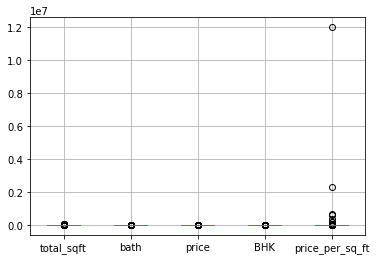

In [355]:
final_dataset.boxplot()

In [356]:
final_dataset[final_dataset['total_sqft']/final_dataset['BHK'] <300]

,location,size,total_sqft,bath,price,BHK,price_per_sq_ft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [357]:
final_dataset.shape

(13246, 7)

In [358]:
final_dataset_1=final_dataset[~(final_dataset['total_sqft']/final_dataset['BHK'] <300)]
final_dataset_1.shape

(12502, 7)

In [359]:
final_dataset_1['price_per_sq_ft'].describe().T

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sq_ft, dtype: float64

In [360]:
final_dataset_1.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,12456.0,1590.189927,1260.404795,300.000000,1115.000000,1300.000000,1700.000000,52272.000000
bath,12502.0,2.564790,1.084946,1.000000,2.000000,2.000000,3.000000,16.000000
price,12502.0,111.311915,152.089966,9.000000,49.000000,70.000000,115.000000,3600.000000
BHK,12502.0,2.650696,0.981698,1.000000,2.000000,3.000000,3.000000,16.000000
price_per_sq_ft,12456.0,6308.502826,4168.127339,267.829813,4210.526316,5294.117647,6916.666667,176470.588235


In [361]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sq_ft)
        st=np.std(subdf.price_per_sq_ft)
        reduced_df=subdf[(subdf.price_per_sq_ft >(m-st)) &(subdf.price_per_sq_ft <=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [362]:
final_dataset_2=remove_pps_outliers(final_dataset_1)
final_dataset_2.shape

(10244, 7)

In [365]:
final_dataset_2.head(50)

,location,size,total_sqft,bath,price,BHK,price_per_sq_ft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.00,2,4540.654699
6,Devarachikkanahalli,2 BHK,1130.0,2.0,36.00,2,3185.840708
7,Devarachikkanahalli,3 BHK,1417.0,2.0,76.00,3,5363.443896
8,Devarachikkanahalli,2 BHK,1230.0,2.0,58.00,2,4715.447154
9,Devarachikkanahalli,3 BHK,1705.0,3.0,75.00,3,4398.826979


In [366]:
def remove_Bhk_outlier(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
            'mean':np.mean(bhk_df.price_per_sq_ft),
                'std':np.std(bhk_df.price_per_sq_ft),
                    'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sq_ft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')                 

In [367]:
final_dataset_3=remove_Bhk_outlier(final_dataset_2)

In [368]:
final_dataset_3.shape

(7342, 7)